In [7]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii

from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value

path = r'/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42'
Mod = pc.CloudyModel(path)
Mod.print_lines()
A = Mod.n_ions
#print(A)
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))

Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




#print(np.sum(Mod.dr*Mod.nH))

N_H = sum(Mod.dr*Mod.nH)
frac_C = 2.45E-04
frac_O = 4.90E-04
frac_N = 8.51E-05
frac_Mg = 3.47E-05

N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_Mg','r')
header = f.readline()
frac_Mg_II = np.zeros(435)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    frac_Mg_II[i] = j
    i = i + 1
N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

print('N_H', N_H)
print('Lya',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)




H__1_121567A 4.728304e+41
H__1_102572A 2.158323e+38
H__1_486133A 1.499081e+40
H__1_656281A 4.262974e+40
O__6_103191A 5.772235e+38
O__6_103762A 3.552442e+38
HE_2_972108A 4.766850e+38
HE_2_102527A 1.164254e+39
HE_2_164043A 1.351513e+40
C__4_155078A 1.944255e+39
O__3_500684A 9.407083e+40
N__5_123882A 4.836766e+38
N__5_124280A 3.082952e+38
C__4_154819A 3.702084e+39
C__4_155078A_1 1.944255e+39
MG_2_279553A 5.976689e+39
MG_2_280271A 3.147753e+39
N_H 4.955430822604e+21
Lya 4.7283037431845475e+41 4.0966603791622084e+21
O VI 9.324677330407344e+38 2.7685291098842724e+16
C IV 5.646339114944762e+39 3.773416991899217e+16
N V 7.919718857251325e+38 8092073640208916.0
Mg II 9.124442192944872e+39 1.381632650950081e+17


Lya 4.7283037431845475e+41 4.0966603791622084e+21
O VI 9.324677330407344e+38 2.7685291098842724e+16
C IV 5.646339114944762e+39 3.773416991899217e+16
N V 7.919718857251325e+38 8092073640208916.0
Mg II 9.124442192944872e+39 1.381632650950081e+17


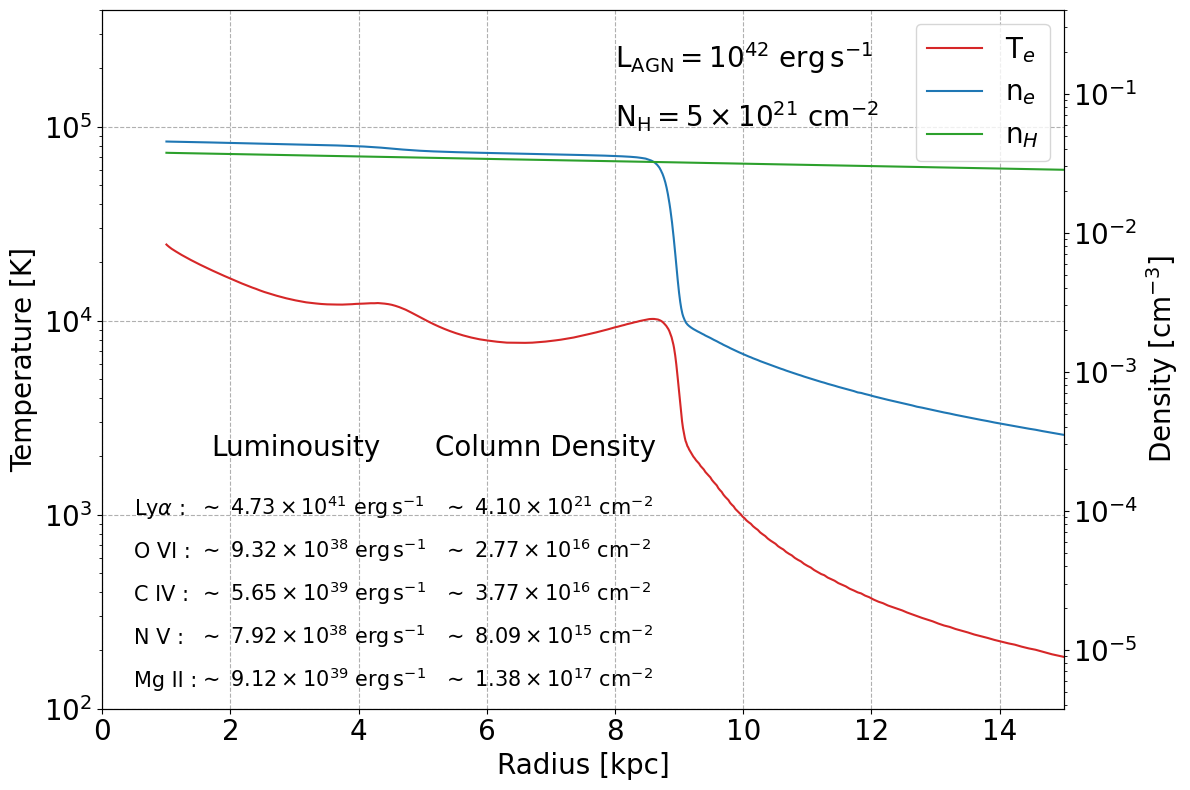

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.set_xlim(0,15)
ax1.set_yscale('log')
plt.legend(fontsize=20)

# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax2.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color, label=r'n$_{H}$')
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim(0,15)
ax2.set_yscale('log')

# 레이아웃 조정
fig.tight_layout()
plt.legend()

# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# ax2의 레전드 제거
ax2.get_legend().remove()
ax1.set_ylim(top=4e5,bottom=100)
ax2.set_ylim(top=0.4)
ax1.grid(True,linestyle='--')
print('Lya',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e3
y_factor = 0.6  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(5)]

ax1.text(8, 2e5, r'$\rm L_{\rm AGN} = 10^{42} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
ax1.text(8, 1e5, r'$\rm N_{H} = 5 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 2
ax1.text(1.7, y_coords[0] , r'Luminousity', fontsize=20)
ax1.text(5.2, y_coords[0] , r'Column Density', fontsize=20)

labels = ['Ly$\\alpha$', 'O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya, Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI, N_OVI, N_CIV, N_NV, N_MgII]

for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
    ax1.text(0.5, y_coords[i]/di, f'{label} :', fontsize=15)
    ax1.text(1.5, y_coords[i]/di , r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
    ax1.text(5.3, y_coords[i]/di , r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)


Lya 4.7283037431845475e+41 4.0966603791622084e+21
O VI 9.324677330407344e+38 2.7685291098842724e+16
C IV 5.646339114944762e+39 3.773416991899217e+16
N V 7.919718857251325e+38 8092073640208916.0
Mg II 9.124442192944872e+39 1.381632650950081e+17


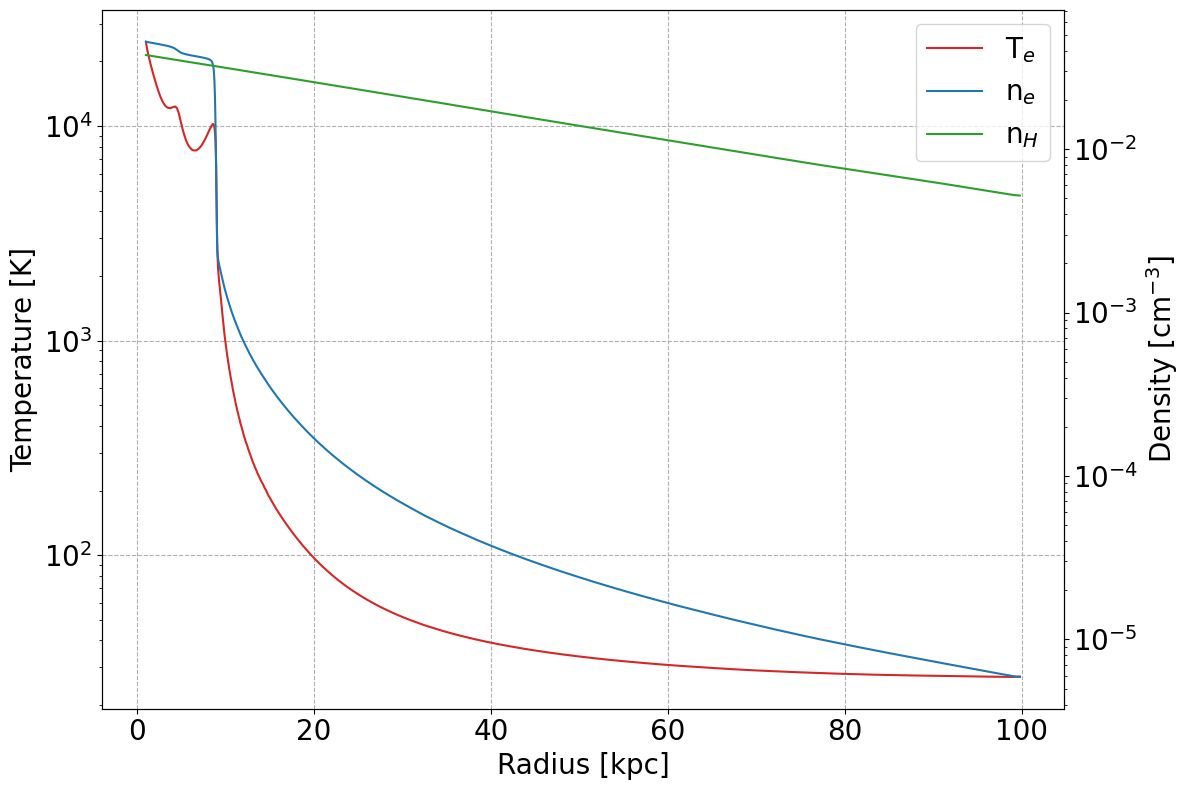

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
# ax1.set_xlim(0,15)
ax1.set_yscale('log')
plt.legend(fontsize=20)

# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax2.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color, label=r'n$_{H}$')
ax2.tick_params(axis='y', labelsize=20)
# ax2.set_xlim(0,15)
ax2.set_yscale('log')

# 레이아웃 조정
fig.tight_layout()
plt.legend()

# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# ax2의 레전드 제거
ax2.get_legend().remove()
# ax1.set_ylim(top=4e5,bottom=100)
# ax2.set_ylim(top=0.4)
ax1.grid(True,linestyle='--')
print('Lya',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e3
y_factor = 0.6  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(5)]

# ax1.text(8, 2e5, r'$\rm L_{\rm AGN} = 10^{42} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
# ax1.text(8, 1e5, r'$\rm N_{H} = 5 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 2
# ax1.text(1.7, y_coords[0] , r'Luminousity', fontsize=20)
# ax1.text(5.2, y_coords[0] , r'Column Density', fontsize=20)

labels = ['Ly$\\alpha$', 'O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya, Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI, N_OVI, N_CIV, N_NV, N_MgII]

# for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
#     ax1.text(0.5, y_coords[i]/di, f'{label} :', fontsize=15)
#     ax1.text(1.5, y_coords[i]/di , r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
#     ax1.text(5.3, y_coords[i]/di , r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)


In [4]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii

from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value

path = r'/home/jin/CIV_Photoionization/Lumin_43/CIV_Lumin_43'
Mod = pc.CloudyModel(path)
Mod.print_lines()
A = Mod.n_ions
#print(A)
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))

Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




#print(np.sum(Mod.dr*Mod.nH))

N_H = sum(Mod.dr*Mod.nH)
frac_C = 2.45E-04
frac_O = 4.90E-04
frac_N = 8.51E-05
frac_Mg = 3.47E-05

N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

# f = open('CIV_Lumin_42.ele_Mg','r')
# header = f.readline()
# frac_Mg_II = np.zeros(435)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[2])
#     frac_Mg_II[i] = j
#     i = i + 1
# # print(i)
# #    print(name, j)
# # #print(type(frac_Mg_II))
# N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

# print('N_H', N_H)
# print('Lya',Lum_Lya, N_HI)
# print('O VI',Lum_O6, N_OVI)
# print('C IV',Lum_C4, N_CIV)
# print('N V',Lum_N5, N_NV)
# print('Mg II',Lum_Mg2, N_MgII)

f = open('/home/jin/CIV_Photoionization/Lumin_43/CIV_Lumin_43.ele_C', 'r')
header = f.readline()
frac_CIV = np.zeros(446)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[4])
    frac_CIV[i] = j
    i = i + 1
# print(i)
#    print(name, j)
# #print(type(frac_Mg_II))
C_IV_t= frac_C*sum(Mod.dr*Mod.nH*frac_CIV)

print('N_H', N_H)
print('Lya',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('C IV',Lum_C4, C_IV_t)


# print('N V',Lum_N5, N_NV)

# print('Mg II',Lum_Mg2, N_MgII)




H__1_121567A 4.431840e+42
H__1_102572A 2.448711e+39
H__1_486133A 1.475932e+41
H__1_656281A 4.172504e+41
O__6_103191A 2.186385e+40
O__6_103762A 1.196432e+40
HE_2_972108A 5.023238e+39
HE_2_102527A 1.226931e+40
HE_2_164043A 1.408755e+41
C__4_155078A 3.692953e+40
O__3_500684A 1.093215e+42
N__5_123882A 1.014519e+40
N__5_124280A 5.934388e+39
C__4_154819A 7.135382e+40
C__4_155078A_1 3.692953e+40
MG_2_279553A 4.806656e+40
MG_2_280271A 2.535569e+40
N_H 4.968446120300001e+21
Lya 4.431839610352317e+42 2.9668212868633943e+21
O VI 3.382816750952123e+40 9.756538333941854e+16
C IV 1.0828335714053654e+41 8.964035465426182e+16
C IV 1.0828335714053654e+41 8.964035465426182e+16


Lya 4.431839610352317e+42 2.9668212868633943e+21
O VI 3.382816750952123e+40 9.756538333941854e+16
C IV 1.0828335714053654e+41 8.964035465426182e+16
N V 1.6079582523929739e+40 1.9920139621830864e+16
Mg II 7.342225379503813e+40 1.381632650950081e+17


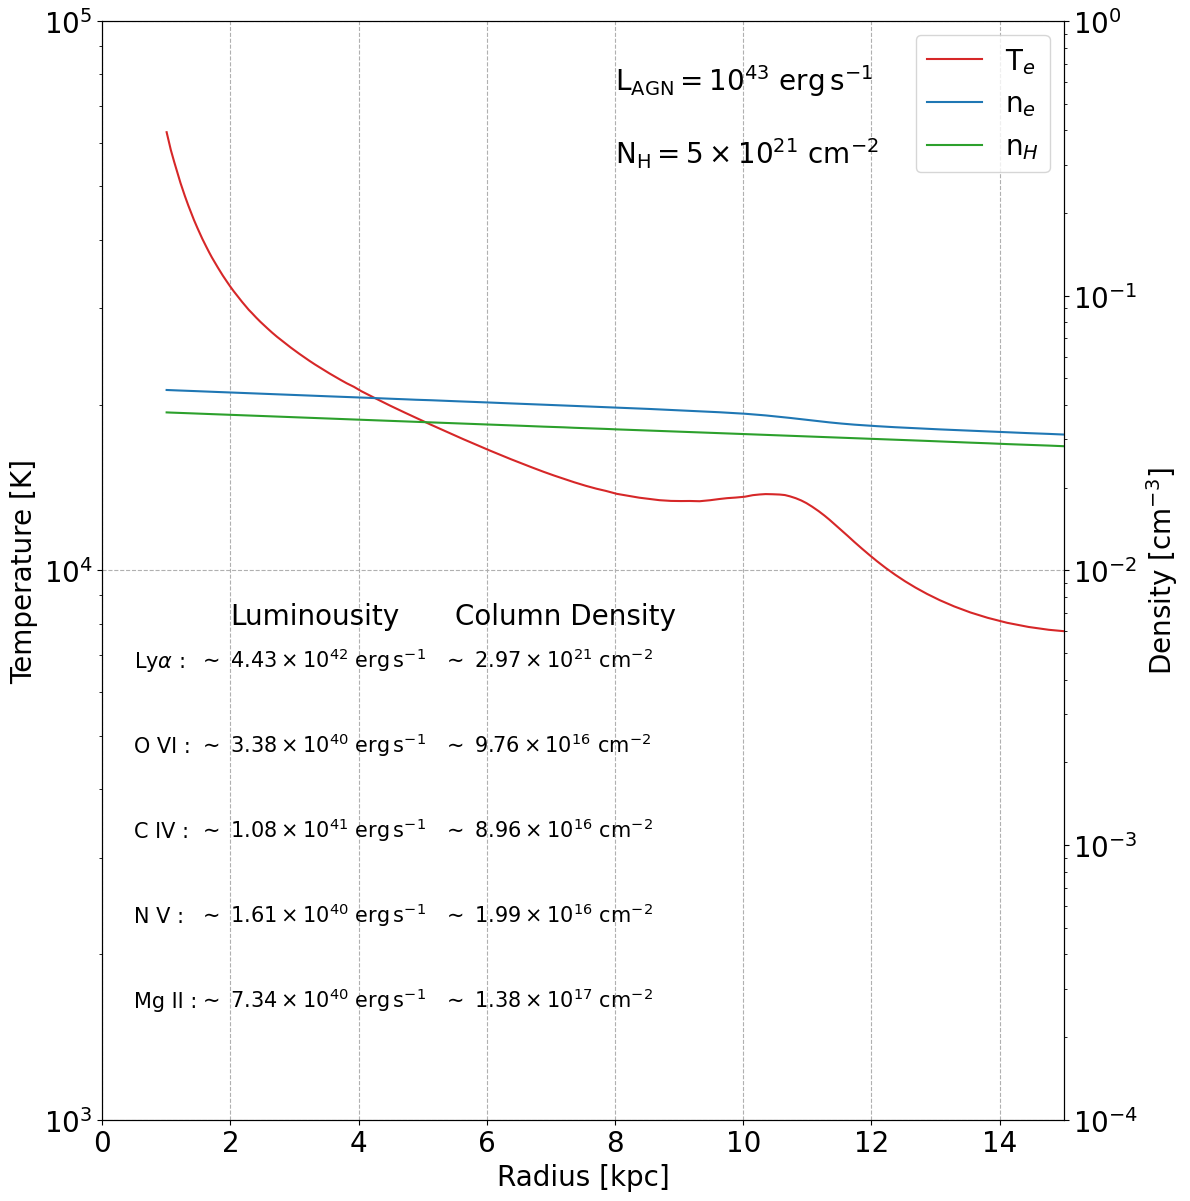

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 12))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.set_xlim(0,15)
ax1.set_yscale('log')
plt.legend(fontsize=20)

# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax2.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color, label=r'n$_{H}$')
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim(0,15)
ax2.set_yscale('log')

# 레이아웃 조정
fig.tight_layout()
plt.legend()

# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# ax2의 레전드 제거
ax2.get_legend().remove()
ax1.set_ylim(top=1e5, bottom=1e3)
ax2.set_ylim(top=1, bottom=1e-4)
ax1.grid(True,linestyle='--')

print('Lya',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e4
y_factor = 0.7  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(5)]

ax1.text(8, 7.5e4, r'$\rm L_{\rm AGN} = 10^{43} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
ax1.text(8, 5.5e4, r'$\rm N_{H} = 5 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 3
ax1.text(2.0, y_coords[0] * 1.2 /di, r'Luminousity', fontsize=20)
ax1.text(5.5, y_coords[0] * 1.2 /di, r'Column Density', fontsize=20)

labels = ['Ly$\\alpha$', 'O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya, Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI, N_OVI, N_CIV, N_NV, N_MgII]

for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
    ax1.text(0.5, y_coords[i]/di, f'{label} :', fontsize=15)
    ax1.text(1.5, y_coords[i]/di, r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
    ax1.text(5.3, y_coords[i]/di, r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)

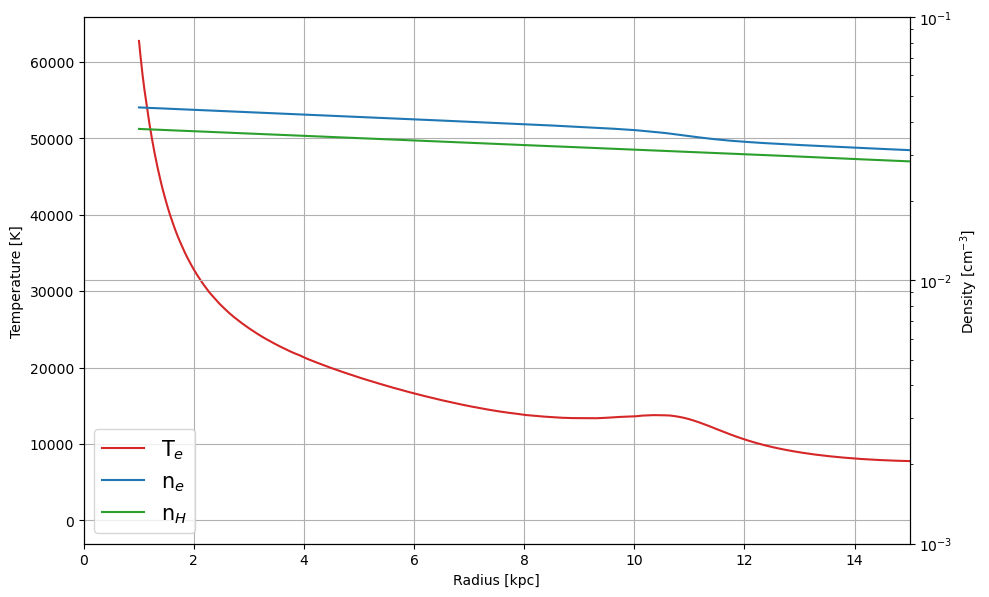

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]')
ax1.set_ylabel('Temperature [K]')
ax1.plot(Mod.radius/kpc, Mod.te, color=color,label=r'T$_{e}$')
ax1.tick_params(axis='y')
ax1.set_xlim(0,15)
# ax1.set_yscale('log')
plt.legend()
# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]')
ax2.plot(Mod.radius/kpc, Mod.ne, color=color,label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color,label=r'n$_{H}$')
ax2.tick_params(axis='y')
ax2.set_xlim(0,15)
ax2.set_yscale('log')
# 레이아웃 조정
fig.tight_layout()
plt.legend()
# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left',fontsize=15)

# ax2의 레전드 제거
ax2.get_legend().remove()
# ax1.set_ylim(top=3e5,bottom=1e4)
ax2.set_ylim(top=0.1,bottom=1e-3)
ax1.grid(True)
ax2.grid(True)


In [1]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii

from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value

path = r'/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44'
Mod = pc.CloudyModel(path)
Mod.print_lines()
A = Mod.n_ions
#print(A)
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))

Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




#print(np.sum(Mod.dr*Mod.nH))

N_H = sum(Mod.dr*Mod.nH)
frac_C = 2.45E-04
frac_O = 4.90E-04
frac_N = 8.51E-05
frac_Mg = 3.47E-05

N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

# f = open('CIV_Lumin_42.ele_Mg','r')
# header = f.readline()
# frac_Mg_II = np.zeros(435)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[2])
#     frac_Mg_II[i] = j
#     i = i + 1
# # print(i)
# #    print(name, j)
# # #print(type(frac_Mg_II))
# N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

# print('N_H', N_H)
# print('Lya',Lum_Lya, N_HI)
# print('O VI',Lum_O6, N_OVI)
# print('C IV',Lum_C4, N_CIV)
# print('N V',Lum_N5, N_NV)
# print('Mg II',Lum_Mg2, N_MgII)

f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_C', 'r')
header = f.readline()
frac_CIV = np.zeros(410)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[4])
    frac_CIV[i] = j
    i = i + 1
# print(i)
#    print(name, j)
# #print(type(frac_Mg_II))
C_IV_t= frac_C*sum(Mod.dr*Mod.nH*frac_CIV)

# print('N_H', N_H)
# print('Lya',Lum_Lya, N_HI)
# print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('C IV',Lum_C4, C_IV_t)


# print('N V',Lum_N5, N_NV)

# print('Mg II',Lum_Mg2, N_MgII)




H__1_121567A 3.631882e+43
H__1_102572A 2.779192e+40
H__1_486133A 1.424998e+42
H__1_656281A 3.986791e+42
O__6_103191A 5.469886e+41
O__6_103762A 2.903088e+41
HE_2_972108A 5.271684e+40
HE_2_102527A 1.287683e+41
HE_2_164043A 1.460991e+42
C__4_155078A 6.126538e+41
O__3_500684A 1.208906e+43
N__5_123882A 1.997097e+41
N__5_124280A 1.103241e+41
C__4_154819A 1.192686e+42
C__4_155078A_1 6.126538e+41
MG_2_279553A 3.157368e+41
MG_2_280271A 1.639613e+41
C IV 1.8053398649081185e+42 2.2204585343196688e+17
C IV 1.8053398649081185e+42 2.2204585343196688e+17


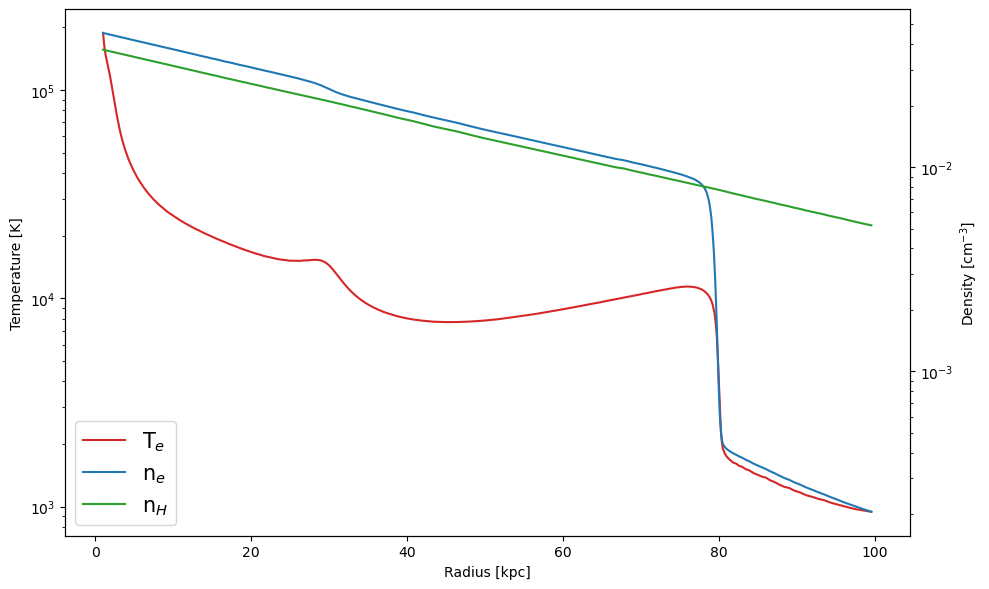

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]')
ax1.set_ylabel('Temperature [K]')
ax1.plot(Mod.radius/kpc, Mod.te, color=color,label=r'T$_{e}$')
ax1.tick_params(axis='y')
# ax1.set_xlim(0,15)
ax1.set_yscale('log')
plt.legend()
# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]')
ax2.plot(Mod.radius/kpc, Mod.ne, color=color,label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color,label=r'n$_{H}$')
ax2.tick_params(axis='y')
# ax2.set_xlim(0,15)
ax2.set_yscale('log')
# 레이아웃 조정
fig.tight_layout()
plt.legend()
# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left',fontsize=15)

# ax2의 레전드 제거
ax2.get_legend().remove()
# ax1.set_ylim(top=27000,bottom=100)
# ax2.set_ylim(top=27000)



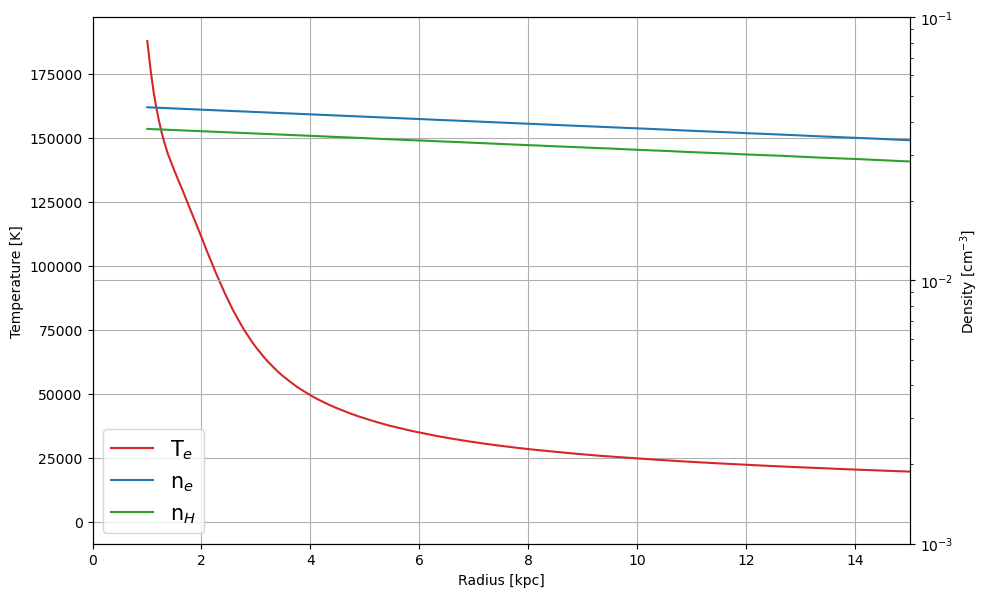

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]')
ax1.set_ylabel('Temperature [K]')
ax1.plot(Mod.radius/kpc, Mod.te, color=color,label=r'T$_{e}$')
ax1.tick_params(axis='y')
ax1.set_xlim(0,15)
# ax1.set_yscale('log')
plt.legend()
# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]')
ax2.plot(Mod.radius/kpc, Mod.ne, color=color,label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color,label=r'n$_{H}$')
ax2.tick_params(axis='y')
ax2.set_xlim(0,15)
ax2.set_yscale('log')
# 레이아웃 조정
fig.tight_layout()
plt.legend()
# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left',fontsize=15)

# ax2의 레전드 제거
ax2.get_legend().remove()
# ax1.set_ylim(top=3e5,bottom=1e4)
ax2.set_ylim(top=0.1,bottom=1e-3)
ax1.grid(True)
ax2.grid(True)
